In [3]:
import scipy  
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl # für Farben
import time
%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,3.0)
plt.rcParams['figure.dpi']=100

# Aufgabe 4.1 Prandtl-van Karman law

Function for friction factor: $f= g(f)=\dfrac{1}{(0.88*ln(Re\sqrt f)-0.81)^2}$

the derivative: g'(f)$=\dfrac{-1}{\pm f*(0.88*ln(Re\sqrt f)-0.81)^3}$



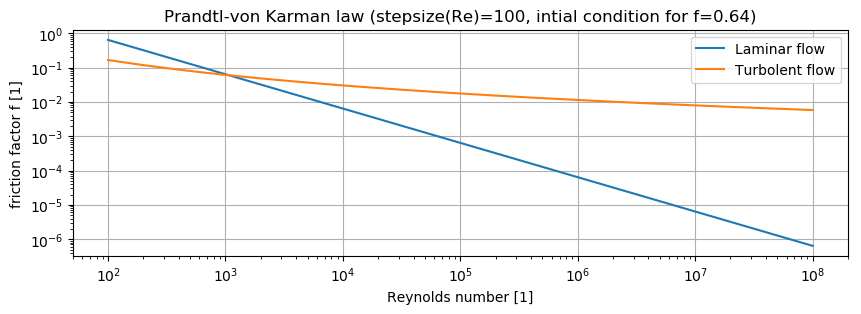

In [4]:
def factor_f(f0,re,acc):
    df = 100000     #Initailisierung für while()-Bed
    dif_gf=0
    
    while (dif_gf<1 and df>acc):
        f_np1 = 1/((0.88*math.log(re*math.sqrt(f0))-0.81)**2) # f=g(f)
       
        dif_gf= math.fabs(1/(f_np1*(0.88*math.log(re*math.sqrt(f_np1))-0.81)**3))#f=g'(f)
        df=math.fabs(f_np1-f0)     #Check Abbruch
        
        f0=f_np1                 # Wert zuweisen für nächste Iteration
        #print(f_np1,dif_gf) #Check Werte
    return f_np1

acc = 0.00001 #Genauigkeit f
step = 100    #Schrittweite
re_dat= np.arange(10**2,10**8,step)

f0_turb = 0.64 #Anfangswert f
#print(factor_f(f0_turb,100,acc))
values_turb = np.array([factor_f(f0_turb,re_,acc)for re_ in re_dat])

plt.loglog(re_dat,64/re_dat,label="Laminar flow")
plt.loglog(re_dat,values_turb,label="Turbolent flow")

plt.xlabel('Reynolds number [1]')
plt.ylabel('friction factor f [1]')                       
plt.legend(loc='upper right')                      
plt.title('Prandtl-von Karman law (stepsize(Re)=100, intial condition for f=0.64)')
plt.grid(True)      
plt.show()

Another way of determining the curve f(Re) is to use the Colebrook equation:

$\dfrac{1}{\sqrt{f}}=-2*log(\frac{2.51}{Re*\sqrt{f}}+\frac{k}{3.72 d_{h}})$

$d_{h}$: Hydraulic diameter

$k$: Roughness of the pipe

$Re$: Reynold number

# Aufgabe 4.4 Powers of integers